In [1]:
import pandas as pd
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

Load Iris Dataset


In [2]:
iris = datasets.load_iris()

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:

column = ['sepal length', 'sepal width', 'petal length', 'petal width']
df = pd.DataFrame(iris['data'], columns = column)

df['target'] = iris['target']

In [6]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df.iloc[1, :].to_frame()

,1
sepal length,4.9
sepal width,3.0
petal length,1.4
petal width,0.2
target,0.0


In [8]:
predict = df[column].corr(method = 'pearson')

In [9]:
from scipy.stats import norm

mu = df['sepal length'].mean()
sigma = df['sepal length'].std(ddof=1)

df['P(x <= sepal length)'] = df['sepal length'].apply(lambda x: norm.cdf(x, loc=mu, scale = sigma))



In [10]:
df.groupby('target')['sepal length'].describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,50.0,5.006,0.352490,4.3,4.800,5.0,5.2,5.8
1,50.0,5.936,0.516171,4.9,5.600,5.9,6.3,7.0
2,50.0,6.588,0.635880,4.9,6.225,6.5,6.9,7.9


In [11]:
predict

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.117570,0.871754,0.817941
sepal width,-0.117570,1.000000,-0.428440,-0.366126
petal length,0.871754,-0.428440,1.000000,0.962865
petal width,0.817941,-0.366126,0.962865,1.000000


In [12]:
predict.min()

sepal length   -0.117570
sepal width    -0.428440
petal length   -0.428440
petal width    -0.366126
dtype: float64

In [13]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [14]:
colnames = ['_'.join(i.split()[:-1]) for i in iris['feature_names']]

In [15]:
colnames

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Exercise 1

<AxesSubplot:xlabel='sepal length', ylabel='sepal width'>

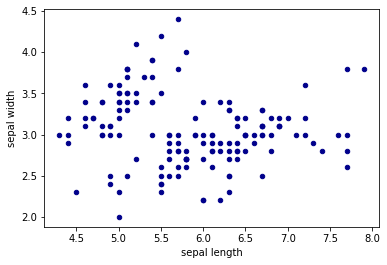

In [16]:
df.plot.scatter(x='sepal length', y = 'sepal width', c='DarkBlue')

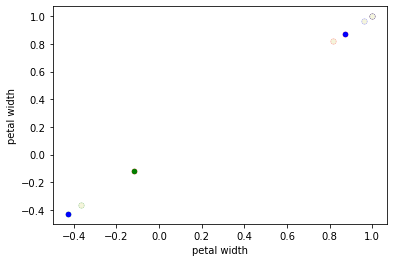

In [17]:
ax1 = predict.plot(kind='scatter', x='sepal length', y='sepal length', color='r')    
ax2 = predict.plot(kind='scatter', x='sepal width', y='sepal width', color='g', ax=ax1)    
ax3 = predict.plot(kind='scatter', x='petal length', y='petal length', color='b', ax=ax1)
ax4 = predict.plot(kind='scatter', x='petal width', y='petal width', color='beige', ax=ax1)

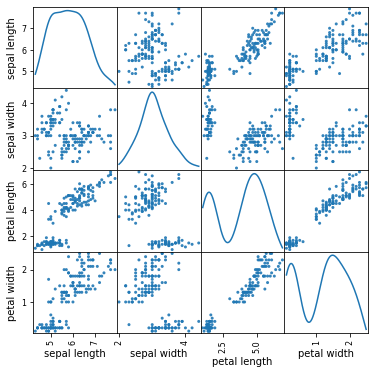

In [18]:
from pandas.plotting import scatter_matrix
_ = scatter_matrix(df.iloc[:, 0:4], alpha=0.9, figsize=(6,6), diagonal="kde")

# Challenge

In [19]:
df2 = pd.read_csv('subjecta-concentrating-1.csv', delimiter =',')

In [20]:
df2

,timestamps,TP9,AF7,AF8,TP10,Right AUX
0,1.533223e+09,59.105,28.320,15.137,12.207,54.199
1,1.533223e+09,62.012,30.273,43.945,11.719,79.102
2,1.533223e+09,44.922,30.273,-97.656,11.230,32.715
3,1.533223e+09,28.809,27.832,-110.352,9.277,29.785
4,1.533223e+09,36.156,28.809,-73.242,11.230,50.781
...,...,...,...,...,...,...
15187,1.533223e+09,25.391,33.203,-388.672,22.461,19.043
15188,1.533223e+09,35.645,33.203,-136.230,24.902,0.977
15189,1.533223e+09,48.828,31.250,258.789,38.086,-15.137
15190,1.533223e+09,50.293,31.250,264.160,39.551,-5.859


In [21]:
df2.isnull().sum()

timestamps    0
TP9           0
AF7           0
AF8           0
TP10          0
Right AUX     0
dtype: int64

In [22]:
df2.describe()

,timestamps,TP9,AF7,AF8,TP10,Right AUX
count,1.519200e+04,15192.000000,15192.000000,15192.000000,15192.000000,15192.000000
mean,1.533223e+09,37.435923,32.128337,-24.929599,15.277019,24.005905
std,1.713077e+01,27.892849,10.549507,160.286413,27.026038,34.776647
min,1.533223e+09,-207.031000,-36.133000,-499.023000,-219.727000,-128.906000
25%,1.533223e+09,25.879000,26.367000,-138.184000,3.418000,0.488000
50%,1.533223e+09,38.086000,31.738000,-40.039000,17.090000,24.414000
75%,1.533223e+09,50.781000,37.598000,61.523000,27.832000,47.852000
max,1.533223e+09,159.180000,111.816000,720.215000,138.672000,175.293000


In [23]:
df2['time'] = pd.to_datetime(df2.iloc[:, 0], unit = 's', origin = 'unix')

In [24]:
df2

,timestamps,TP9,AF7,AF8,TP10,Right AUX,time
0,1.533223e+09,59.105,28.320,15.137,12.207,54.199,2018-08-02 15:09:19.839000064
1,1.533223e+09,62.012,30.273,43.945,11.719,79.102,2018-08-02 15:09:19.842999808
2,1.533223e+09,44.922,30.273,-97.656,11.230,32.715,2018-08-02 15:09:19.846999808
3,1.533223e+09,28.809,27.832,-110.352,9.277,29.785,2018-08-02 15:09:19.851000064
4,1.533223e+09,36.156,28.809,-73.242,11.230,50.781,2018-08-02 15:09:19.855000064
...,...,...,...,...,...,...,...
15187,1.533223e+09,25.391,33.203,-388.672,22.461,19.043,2018-08-02 15:10:19.160000000
15188,1.533223e+09,35.645,33.203,-136.230,24.902,0.977,2018-08-02 15:10:19.164000000
15189,1.533223e+09,48.828,31.250,258.789,38.086,-15.137,2018-08-02 15:10:19.168000000
15190,1.533223e+09,50.293,31.250,264.160,39.551,-5.859,2018-08-02 15:10:19.172000000


In [25]:
df2.iloc[:, 0]

0        1.533223e+09
1        1.533223e+09
2        1.533223e+09
3        1.533223e+09
4        1.533223e+09
             ...     
15187    1.533223e+09
15188    1.533223e+09
15189    1.533223e+09
15190    1.533223e+09
15191    1.533223e+09
Name: timestamps, Length: 15192, dtype: float64

In [26]:
df2.head(251)

,timestamps,TP9,AF7,AF8,TP10,Right AUX,time
0,1.533223e+09,59.105,28.320,15.137,12.207,54.199,2018-08-02 15:09:19.839000064
1,1.533223e+09,62.012,30.273,43.945,11.719,79.102,2018-08-02 15:09:19.842999808
2,1.533223e+09,44.922,30.273,-97.656,11.230,32.715,2018-08-02 15:09:19.846999808
3,1.533223e+09,28.809,27.832,-110.352,9.277,29.785,2018-08-02 15:09:19.851000064
4,1.533223e+09,36.156,28.809,-73.242,11.230,50.781,2018-08-02 15:09:19.855000064
...,...,...,...,...,...,...,...
246,1.533223e+09,83.984,47.363,68.848,30.273,-12.207,2018-08-02 15:09:20.800000000
247,1.533223e+09,76.172,43.457,97.656,27.344,-31.738,2018-08-02 15:09:20.804000000
248,1.533223e+09,67.383,40.039,-41.504,21.484,16.113,2018-08-02 15:09:20.808000000
249,1.533223e+09,53.223,36.133,-46.387,19.043,-11.719,2018-08-02 15:09:20.812000000


In [27]:

startTime = df2.iloc[0, :].timestamps
endTime = df2.iloc[251, :].timestamps

In [28]:
(round(endTime - startTime, 0))

1.0

In [29]:
df2.iloc[1:251, 1:5].mean()

TP9     73.187352
AF7     36.525396
AF8    -15.578116
TP10    29.353500
dtype: float64

In [30]:
df2.iloc[1:251, 1:5].std()

TP9     19.120265
AF7     11.280255
AF8     65.048312
TP10    11.145916
dtype: float64

In [31]:
df2.iloc[1:251, 1:5].skew()

TP9    -0.217486
AF7     0.521538
AF8     0.179613
TP10   -0.253029
dtype: float64

In [32]:
df2.iloc[1:251, 1:5].kurtosis()

TP9    -0.460342
AF7     0.288991
AF8    -0.855297
TP10   -0.290459
dtype: float64

In [43]:
#Notes

#We need 250 rows for sliding window
#Window size = 250
#Feature columns = df2.iloc[:, 1:5]

df2.iloc[:, 1:5].rolling(window = 250).mean()

,TP9,AF7,AF8,TP10
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
15187,27.208992,27.824208,86.894528,22.808624
15188,27.152352,27.843740,84.927732,22.798856
15189,27.197272,27.876944,84.095700,22.822292
15190,27.324224,27.921864,84.212888,22.869168


In [38]:
for window in df2.iloc[:, 1:5].mean().rolling(window = 250):
    print(window)

TP9    37.435923
dtype: float64
TP9    37.435923
AF7    32.128337
dtype: float64
TP9    37.435923
AF7    32.128337
AF8   -24.929599
dtype: float64
TP9     37.435923
AF7     32.128337
AF8    -24.929599
TP10    15.277019
dtype: float64


In [37]:
df2.iloc[:, 1:5].mean().rolling(window = 250).sum()


TP9    NaN
AF7    NaN
AF8    NaN
TP10   NaN
dtype: float64

In [ ]:
#John Solution

In [40]:
df2.keys()

Index(['timestamps', 'TP9', 'AF7', 'AF8', 'TP10', 'Right AUX', 'time'], dtype='object')

In [41]:
df2['TP9_mean'] = df2['TP9'].rolling(250).mean()

,timestamps,TP9,AF7,AF8,TP10,Right AUX,time,TP9_mean
0,1.533223e+09,59.105,28.320,15.137,12.207,54.199,2018-08-02 15:09:19.839000064,NaN
1,1.533223e+09,62.012,30.273,43.945,11.719,79.102,2018-08-02 15:09:19.842999808,NaN
2,1.533223e+09,44.922,30.273,-97.656,11.230,32.715,2018-08-02 15:09:19.846999808,NaN
3,1.533223e+09,28.809,27.832,-110.352,9.277,29.785,2018-08-02 15:09:19.851000064,NaN
4,1.533223e+09,36.156,28.809,-73.242,11.230,50.781,2018-08-02 15:09:19.855000064,NaN
...,...,...,...,...,...,...,...,...
15187,1.533223e+09,25.391,33.203,-388.672,22.461,19.043,2018-08-02 15:10:19.160000000,27.208992
15188,1.533223e+09,35.645,33.203,-136.230,24.902,0.977,2018-08-02 15:10:19.164000000,27.152352
15189,1.533223e+09,48.828,31.250,258.789,38.086,-15.137,2018-08-02 15:10:19.168000000,27.197272
15190,1.533223e+09,50.293,31.250,264.160,39.551,-5.859,2018-08-02 15:10:19.172000000,27.324224


In [44]:
def statMoment(x, k):
    mu_k = np.mean((x - np.mean(x)) ** k)
    sigma_k = (x.std(ddof = 0)) ** k
    
    return mu_k / sigma_k

<AxesSubplot:>

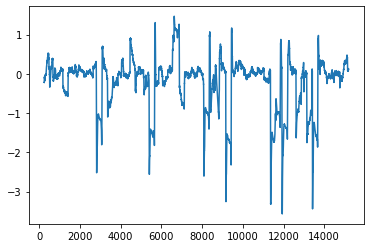

In [46]:
df2['TP9_skewness'] = df2['TP9'].rolling(250).apply(lambda x: statMoment(x, 3))
df2['TP9_skewness'].plot()

<AxesSubplot:>

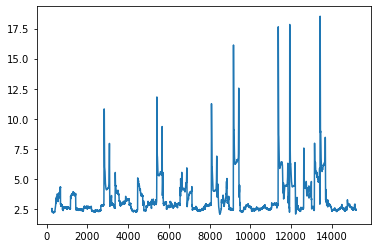

In [47]:
df2['TP9_kurtosis'] = df2['TP9'].rolling(250).apply(lambda x: statMoment(x, 4))
df2['TP9_kurtosis'].plot()

<AxesSubplot:>

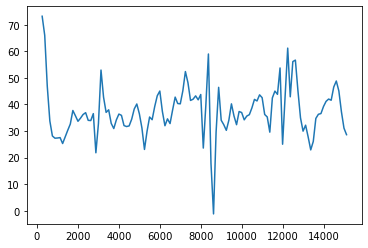

In [48]:
TP9_mean = df2['TP9'].rolling(250).mean()[::125]
TP9_mean.plot()